`GRIP-The Sparks Foundation`

`Data Science and Business Analytics Intern`

`Author: Azmat Sohal`

`Task1-Prediction using Supervised Machine learning`

'Predict the percentage of an student based on the no. of study hours.' 


`This is a simple linear regression task as it involves just 2 variables.`

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the data using pandas
data=pd.read_csv("task1.csv")

In [3]:
#checking the top rows of data
data.head(2)

,Hours,Scores
0,2.5,21
1,5.1,47


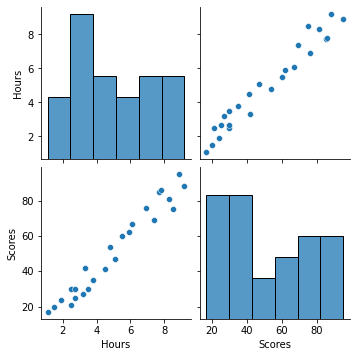

In [46]:
sns.pairplot(data)

In [4]:
#checking number of rows and columns of data
data.shape

(25, 2)

In [5]:
#checking the datatype of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#description of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#checking for any null values present in data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
#viewing the columns of data
data.columns

Index(['Hours', 'Scores'], dtype='object')

`DATA VISUALIZATION`

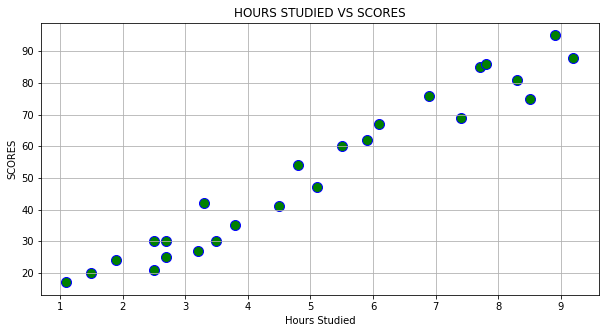

In [9]:
#scatter plot of hours studied vs scores
fig=plt.figure(figsize=(10,5))
plt.scatter(x=data['Hours'], y=data['Scores'],color="green",edgecolor="blue", s=100)
plt.title("HOURS STUDIED VS SCORES")
plt.xlabel("Hours Studied")
plt.ylabel("SCORES")
plt.grid(True)
plt.show()

`the graph shows linear relationship between hours studied and scores`

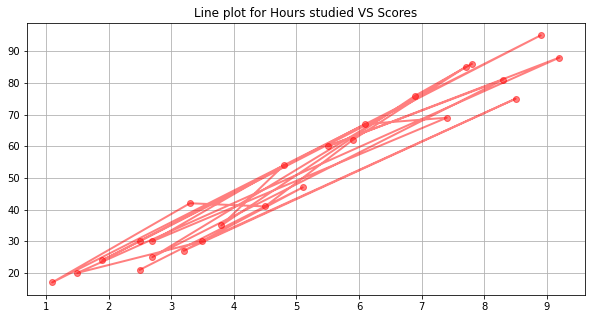

In [10]:
x=data['Hours']
y=data['Scores']
fig=plt.figure(figsize=(10,5))
plt.plot(x,y , linewidth=2.0,  color="red", alpha=0.5, marker='o')
plt.title("Line plot for Hours studied VS Scores")

plt.grid(True)
plt.show()

`Preparing the data`

In [11]:
#splitting data
#assigning hours to x variable
x=data.iloc[:,:-1].values

In [12]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
#assigning scores to y variable
y=data.iloc[:,1].values

In [14]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

train_test_split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
trainX,testX, trainY, testY= train_test_split(x,y, test_size=0.30, random_state=0)

In [17]:
trainX

array([[6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [18]:
trainY

array([76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95, 41],
      dtype=int64)

`LINEAR REGRESSION MODEL`

In [19]:
#importing the library
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [20]:
#fitting the model on traing data
lr.fit(trainX, trainY)


LinearRegression()

In [21]:
#intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

2.370815382341881
[9.78856669]


In [22]:
#predicting the model
ypred=lr.predict(testX)

In [23]:
#values of prediction
ypred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [24]:
#accuracy of model
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(testY, ypred)
r2 = r2_score(testY, ypred)


In [25]:
print(rmse)
print(r2)

22.96509721270043
0.9568211104435257


`Plotting the best fit line`

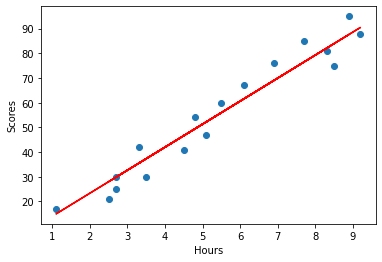

In [30]:
plt.scatter(trainX, trainY)
plt.plot(trainX, 4.705538808455607 + 9.32082254*trainX, 'r')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [31]:
testY

array([20, 27, 69, 30, 62, 35, 24, 86], dtype=int64)

In [32]:
ypred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [33]:
# actual marks and predicted marks
pd.DataFrame({'actual_marks':testY,'predicted_marks':ypred})

,actual_marks,predicted_marks
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [34]:
testX

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9],
       [7.8]])

In [35]:
testX=testX.reshape(-1)

In [36]:
#hours and predicted marks
pd.DataFrame({'Hours':testX,'predicted_marks':ypred})

,Hours,predicted_marks
0,1.5,17.053665
1,3.2,33.694229
2,7.4,74.806209
3,2.5,26.842232
4,5.9,60.123359
5,3.8,39.567369
6,1.9,20.969092
7,7.8,78.721636


`Visualization of actual marks and predicted marks`

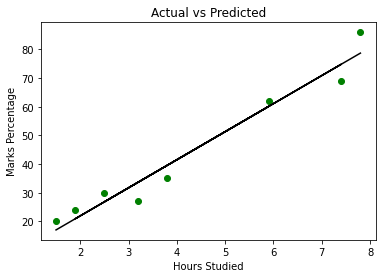

In [38]:

plt.scatter(x=testX, y=testY, color='green')
plt.plot(testX, ypred, color='Black')
plt.title('Actual vs Predicted')
plt.ylabel('Marks Percentage')
plt.xlabel('Hours Studied')
plt.show()

`Measuring the accuracy`

In [41]:
#mean squared error
from sklearn.metrics import mean_squared_error
print("mean squared error is:", mean_squared_error(ypred, testY))

mean squared error is: 22.96509721270043


In [43]:
#mean absolute error
from sklearn.metrics import mean_absolute_error
print("mean absolute error", mean_absolute_error(testY,ypred))

mean absolute error 4.419727808027652


`Predicted score of a student if he/she studies for 9.25 hrs/ day`

In [45]:
hours=[9.25]
lr.predict([hours])

array([92.91505723])